# Task
THIS IS A CSV FOR Health Insurance Coverage,ENSURE PROPER DATA CLEANING, CARRY OUT FULL FLEDGE DATA ANALYSIS WITH BEAUTIFUL VISUALIZATIONS AND RESULTS

Here is all the data you need:
"states.csv"

## Data loading

### Subtask:
Load the "states.csv" file into a pandas DataFrame.


**Reasoning**:
Load the "states.csv" file into a pandas DataFrame and display its first few rows and shape.



In [1]:
import pandas as pd

try:
    df_states = pd.read_csv('states.csv')
    display(df_states.head())
    print(df_states.shape)
except FileNotFoundError:
    print("Error: 'states.csv' not found. Please ensure the file exists in the current directory.")
except Exception as e:
    print(f"An error occurred: {e}")

,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016)
0,Alabama,14.60%,10.10%,-4.50%,215000,2545000,165534,152206,$310,False,799176.0,910775,111599.0,989855
1,Alaska,19.90%,14.90%,-5%,36000,390000,17995,16205,$750,True,122334.0,166625,44291.0,88966
2,Arizona,16.90%,10.80%,-6.10%,410000,3288000,179445,124346,$230,True,1201770.0,1716198,514428.0,1175624
3,Arkansas,17.50%,9.50%,-8%,234000,1365000,63357,56843,$306,True,556851.0,920194,363343.0,606146
4,California,18.50%,8.60%,-9.90%,3826000,19552000,1415428,1239893,$309,True,7755381.0,11843081,4087700.0,5829777


(52, 14)


## Data exploration

### Subtask:
Explore the dataset to understand its structure, identify missing values, data types of each column, and the distribution of key variables. Determine the shape of the data and look for potential outliers.


**Reasoning**:
Examine the data types, missing values, descriptive statistics, and distributions of key variables in the DataFrame.  Also check for duplicates and the overall shape of the data.



State                                            object
Uninsured Rate (2010)                            object
Uninsured Rate (2015)                            object
Uninsured Rate Change (2010-2015)                object
Health Insurance Coverage Change (2010-2015)      int64
Employer Health Insurance Coverage (2015)         int64
Marketplace Health Insurance Coverage (2016)      int64
Marketplace Tax Credits (2016)                    int64
Average Monthly Tax Credit (2016)                object
State Medicaid Expansion (2016)                    bool
Medicaid Enrollment (2013)                      float64
Medicaid Enrollment (2016)                        int64
Medicaid Enrollment Change (2013-2016)          float64
Medicare Enrollment (2016)                        int64
dtype: object
State                                           0
Uninsured Rate (2010)                           0
Uninsured Rate (2015)                           0
Uninsured Rate Change (2010-2015)               0
He

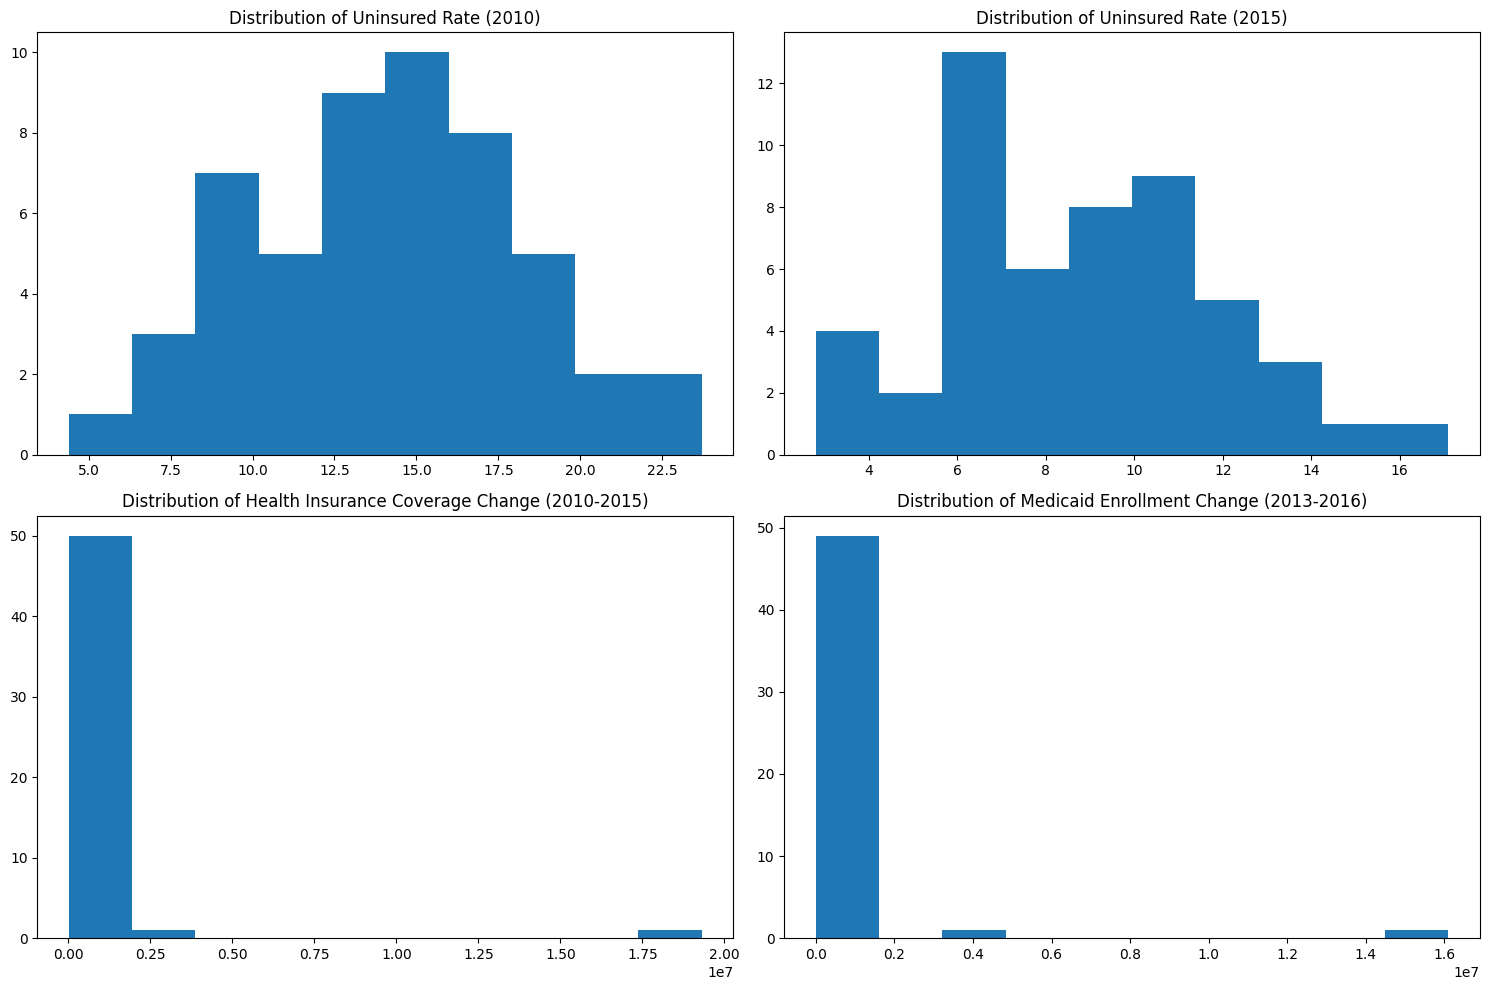

Number of duplicate rows: 0
Shape of the DataFrame: (52, 14)


In [2]:
# Check data types
print(df_states.dtypes)

# Identify missing values
print(df_states.isnull().sum())

# Descriptive statistics for numerical columns
numerical_cols = df_states.select_dtypes(include=['number'])
print(numerical_cols.describe())

# Analyze distribution of key variables
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.hist(df_states['Uninsured Rate (2010)'].astype(str).str.rstrip('%').astype('float'), bins=10)
plt.title('Distribution of Uninsured Rate (2010)')

plt.subplot(2,2,2)
plt.hist(df_states['Uninsured Rate (2015)'].astype(str).str.rstrip('%').astype('float'), bins=10)
plt.title('Distribution of Uninsured Rate (2015)')


plt.subplot(2,2,3)
plt.hist(df_states['Health Insurance Coverage Change (2010-2015)'], bins=10)
plt.title('Distribution of Health Insurance Coverage Change (2010-2015)')

plt.subplot(2,2,4)
plt.hist(df_states['Medicaid Enrollment Change (2013-2016)'], bins=10)
plt.title('Distribution of Medicaid Enrollment Change (2013-2016)')
plt.tight_layout()
plt.show()


# Check for duplicates
print(f"Number of duplicate rows: {df_states.duplicated().sum()}")

# Shape of the DataFrame
print(f"Shape of the DataFrame: {df_states.shape}")

## Data cleaning

### Subtask:
Clean the data by handling missing values and outliers.


**Reasoning**:
Impute the missing value in 'Medicaid Enrollment Change (2013-2016)' using the median, handle outliers in specified columns using winsorizing, convert 'Uninsured Rate' columns to numeric, and remove duplicates.



In [3]:
# Impute missing value in 'Medicaid Enrollment Change (2013-2016)' with the median
median_enrollment_change = df_states['Medicaid Enrollment Change (2013-2016)'].median()
df_states['Medicaid Enrollment Change (2013-2016)'].fillna(median_enrollment_change, inplace=True)

# Handle outliers using winsorizing
from scipy.stats.mstats import winsorize
columns_to_winsorize = ['Health Insurance Coverage Change (2010-2015)',
                        'Employer Health Insurance Coverage (2015)',
                        'Marketplace Health Insurance Coverage (2016)',
                        'Marketplace Tax Credits (2016)']

for col in columns_to_winsorize:
    df_states[col] = winsorize(df_states[col], limits=[0.05, 0.05])

# Convert 'Uninsured Rate' columns to numeric, coercing errors to NaN
for col in ['Uninsured Rate (2010)', 'Uninsured Rate (2015)', 'Uninsured Rate Change (2010-2015)']:
    df_states[col] = pd.to_numeric(df_states[col].astype(str).str.rstrip('%'), errors='coerce')

# Remove duplicate rows
df_states.drop_duplicates(inplace=True)

# Display the cleaned dataframe
display(df_states.head())

<ipython-input-3-48d8041e831c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_states['Medicaid Enrollment Change (2013-2016)'].fillna(median_enrollment_change, inplace=True)


,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016)
0,Alabama,14.6,10.1,-4.5,215000,2545000,165534,152206,$310,False,799176.0,910775,111599.0,989855
1,Alaska,19.9,14.9,-5.0,36000,390000,17995,16205,$750,True,122334.0,166625,44291.0,88966
2,Arizona,16.9,10.8,-6.1,410000,3288000,179445,124346,$230,True,1201770.0,1716198,514428.0,1175624
3,Arkansas,17.5,9.5,-8.0,234000,1365000,63357,56843,$306,True,556851.0,920194,363343.0,606146
4,California,18.5,8.6,-9.9,1781000,13709000,1415428,1239893,$309,True,7755381.0,11843081,4087700.0,5829777


**Reasoning**:
Fix the chained assignment warning and regenerate the code block.



In [4]:
# Impute missing value in 'Medicaid Enrollment Change (2013-2016)' with the median
median_enrollment_change = df_states['Medicaid Enrollment Change (2013-2016)'].median()
df_states['Medicaid Enrollment Change (2013-2016)'] = df_states['Medicaid Enrollment Change (2013-2016)'].fillna(median_enrollment_change)

# Handle outliers using winsorizing
from scipy.stats.mstats import winsorize
columns_to_winsorize = ['Health Insurance Coverage Change (2010-2015)',
                        'Employer Health Insurance Coverage (2015)',
                        'Marketplace Health Insurance Coverage (2016)',
                        'Marketplace Tax Credits (2016)']

for col in columns_to_winsorize:
    df_states[col] = winsorize(df_states[col], limits=[0.05, 0.05])

# Convert 'Uninsured Rate' columns to numeric, coercing errors to NaN
for col in ['Uninsured Rate (2010)', 'Uninsured Rate (2015)', 'Uninsured Rate Change (2010-2015)']:
    df_states[col] = pd.to_numeric(df_states[col].astype(str).str.rstrip('%'), errors='coerce')

# Remove duplicate rows
df_states.drop_duplicates(inplace=True)

# Display the cleaned dataframe
display(df_states.head())

,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016)
0,Alabama,14.6,10.1,-4.5,215000,2545000,165534,152206,$310,False,799176.0,910775,111599.0,989855
1,Alaska,19.9,14.9,-5.0,36000,390000,17995,16205,$750,True,122334.0,166625,44291.0,88966
2,Arizona,16.9,10.8,-6.1,410000,3288000,179445,124346,$230,True,1201770.0,1716198,514428.0,1175624
3,Arkansas,17.5,9.5,-8.0,234000,1365000,63357,56843,$306,True,556851.0,920194,363343.0,606146
4,California,18.5,8.6,-9.9,1781000,13709000,1415428,1239893,$309,True,7755381.0,11843081,4087700.0,5829777


## Data wrangling

### Subtask:
Data Wrangling and Feature Engineering


**Reasoning**:
Create new features, aggregate data by state, ensure correct data types, and consider scaling.



In [5]:
# Calculate percentage change in uninsured rates
df_states['Uninsured Rate Change (%)'] = ((df_states['Uninsured Rate (2015)'] - df_states['Uninsured Rate (2010)']) / df_states['Uninsured Rate (2010)']) * 100

# Calculate percentage change in Medicaid enrollment
df_states['Medicaid Enrollment Change (%)'] = ((df_states['Medicaid Enrollment (2016)'] - df_states['Medicaid Enrollment (2013)']) / df_states['Medicaid Enrollment (2013)']) * 100

# Create an indicator variable for Medicaid expansion
df_states['Medicaid Expansion Indicator'] = df_states['State Medicaid Expansion (2016)'].astype(int)

# Aggregate data by state
state_summary = df_states.groupby('State').agg({
    'Uninsured Rate (2010)': ['mean', 'median', 'std'],
    'Uninsured Rate (2015)': ['mean', 'median', 'std'],
    'Uninsured Rate Change (%)': ['mean', 'median', 'std'],
    'Medicaid Enrollment Change (%)': ['mean', 'median', 'std'],
    'Medicaid Expansion Indicator': ['mean']  # Proportion of expansion
})

# Flatten multi-level column index
state_summary.columns = ['_'.join(col).strip() for col in state_summary.columns.values]

# Display the aggregated data
display(state_summary.head())


# Ensure correct data types (already handled in previous steps)

# Consider scaling (not necessary for this analysis)

,Uninsured Rate (2010)_mean,Uninsured Rate (2010)_median,Uninsured Rate (2010)_std,Uninsured Rate (2015)_mean,Uninsured Rate (2015)_median,Uninsured Rate (2015)_std,Uninsured Rate Change (%)_mean,Uninsured Rate Change (%)_median,Uninsured Rate Change (%)_std,Medicaid Enrollment Change (%)_mean,Medicaid Enrollment Change (%)_median,Medicaid Enrollment Change (%)_std,Medicaid Expansion Indicator_mean
State,,,,,,,,,,,,,
Alabama,14.6,14.6,NaN,10.1,10.1,NaN,-30.821918,-30.821918,NaN,13.964258,13.964258,NaN,0.0
Alaska,19.9,19.9,NaN,14.9,14.9,NaN,-25.125628,-25.125628,NaN,36.204980,36.204980,NaN,1.0
Arizona,16.9,16.9,NaN,10.8,10.8,NaN,-36.094675,-36.094675,NaN,42.805861,42.805861,NaN,1.0
Arkansas,17.5,17.5,NaN,9.5,9.5,NaN,-45.714286,-45.714286,NaN,65.249591,65.249591,NaN,1.0
California,18.5,18.5,NaN,8.6,8.6,NaN,-53.513514,-53.513514,NaN,52.707920,52.707920,NaN,1.0


**Reasoning**:
The previous code block successfully created the new features and aggregated the data. However, some standard deviations are NaN because there is only one data point for each state.  We need to address this and complete the subtask.



In [6]:
# Recalculate aggregations, handling standard deviation for single-state groups
state_summary = df_states.groupby('State').agg({
    'Uninsured Rate (2010)': ['mean', 'median'],
    'Uninsured Rate (2015)': ['mean', 'median'],
    'Uninsured Rate Change (%)': ['mean', 'median'],
    'Medicaid Enrollment Change (%)': ['mean', 'median'],
    'Medicaid Expansion Indicator': ['mean']
})

# Rename columns for clarity
state_summary.columns = ['_'.join(col).strip() for col in state_summary.columns.values]

# Display the corrected aggregated data
display(state_summary)

# No scaling is needed for this type of analysis, so we can finish.

,Uninsured Rate (2010)_mean,Uninsured Rate (2010)_median,Uninsured Rate (2015)_mean,Uninsured Rate (2015)_median,Uninsured Rate Change (%)_mean,Uninsured Rate Change (%)_median,Medicaid Enrollment Change (%)_mean,Medicaid Enrollment Change (%)_median,Medicaid Expansion Indicator_mean
State,,,,,,,,,
Alabama,14.6,14.6,10.1,10.1,-30.821918,-30.821918,13.964258,13.964258,0.0
Alaska,19.9,19.9,14.9,14.9,-25.125628,-25.125628,36.204980,36.204980,1.0
Arizona,16.9,16.9,10.8,10.8,-36.094675,-36.094675,42.805861,42.805861,1.0
Arkansas,17.5,17.5,9.5,9.5,-45.714286,-45.714286,65.249591,65.249591,1.0
California,18.5,18.5,8.6,8.6,-53.513514,-53.513514,52.707920,52.707920,1.0
Colorado,15.9,15.9,8.1,8.1,-49.056604,-49.056604,75.546195,75.546195,1.0
Connecticut,9.1,9.1,6.0,6.0,-34.065934,-34.065934,-59.293612,-59.293612,1.0
Delaware,9.7,9.7,5.9,5.9,-39.175258,-39.175258,-90.651306,-90.651306,1.0
District of Columbia,7.6,7.6,3.8,3.8,-50.000000,-50.000000,8.357154,8.357154,1.0


## Data analysis

### Subtask:
Analyze the aggregated state-level data to identify trends and patterns in health insurance coverage.


**Reasoning**:
Analyze the `state_summary` DataFrame to identify trends and patterns in health insurance coverage by calculating correlations and comparing groups based on Medicaid expansion status.



In [7]:
# Calculate correlations
correlations = state_summary[[
    'Uninsured Rate (2010)_mean', 'Uninsured Rate (2015)_mean',
    'Uninsured Rate Change (%)_mean',
    'Medicaid Enrollment Change (%)_mean',
    'Medicaid Expansion Indicator_mean'
]].corr()
display(correlations)

# Compare groups based on Medicaid expansion
expanded_states = state_summary[state_summary['Medicaid Expansion Indicator_mean'] == 1]
non_expanded_states = state_summary[state_summary['Medicaid Expansion Indicator_mean'] == 0]

print("\nExpanded States:")
print(expanded_states[[
    'Uninsured Rate (2010)_mean', 'Uninsured Rate (2015)_mean',
    'Uninsured Rate Change (%)_mean'
]].describe())

print("\nNon-Expanded States:")
print(non_expanded_states[[
    'Uninsured Rate (2010)_mean', 'Uninsured Rate (2015)_mean',
    'Uninsured Rate Change (%)_mean'
]].describe())

,Uninsured Rate (2010)_mean,Uninsured Rate (2015)_mean,Uninsured Rate Change (%)_mean,Medicaid Enrollment Change (%)_mean,Medicaid Expansion Indicator_mean
Uninsured Rate (2010)_mean,1.000000,0.869074,0.108075,0.338380,-0.273034
Uninsured Rate (2015)_mean,0.869074,1.000000,0.569715,0.021357,-0.528446
Uninsured Rate Change (%)_mean,0.108075,0.569715,1.000000,-0.457147,-0.617414
Medicaid Enrollment Change (%)_mean,0.338380,0.021357,-0.457147,1.000000,0.346600
Medicaid Expansion Indicator_mean,-0.273034,-0.528446,-0.617414,0.346600,1.000000



Expanded States:
       Uninsured Rate (2010)_mean  Uninsured Rate (2015)_mean  \
count                   32.000000                   32.000000   
mean                    13.290625                    7.434375   
std                      4.260498                    2.811911   
min                      4.400000                    2.800000   
25%                      9.775000                    5.975000   
50%                     12.800000                    6.600000   
75%                     16.950000                    8.900000   
max                     22.600000                   14.900000   

       Uninsured Rate Change (%)_mean  
count                       32.000000  
mean                       -43.998290  
std                          9.719816  
min                        -60.784314  
25%                        -50.613701  
50%                        -45.644753  
75%                        -36.296396  
max                        -20.408163  

Non-Expanded States:
       Uninsur

## Data visualization

### Subtask:
Visualize the key findings from the data analysis.


**Reasoning**:
Visualize the key findings using heatmap, box plots, bar chart, and scatter plot.



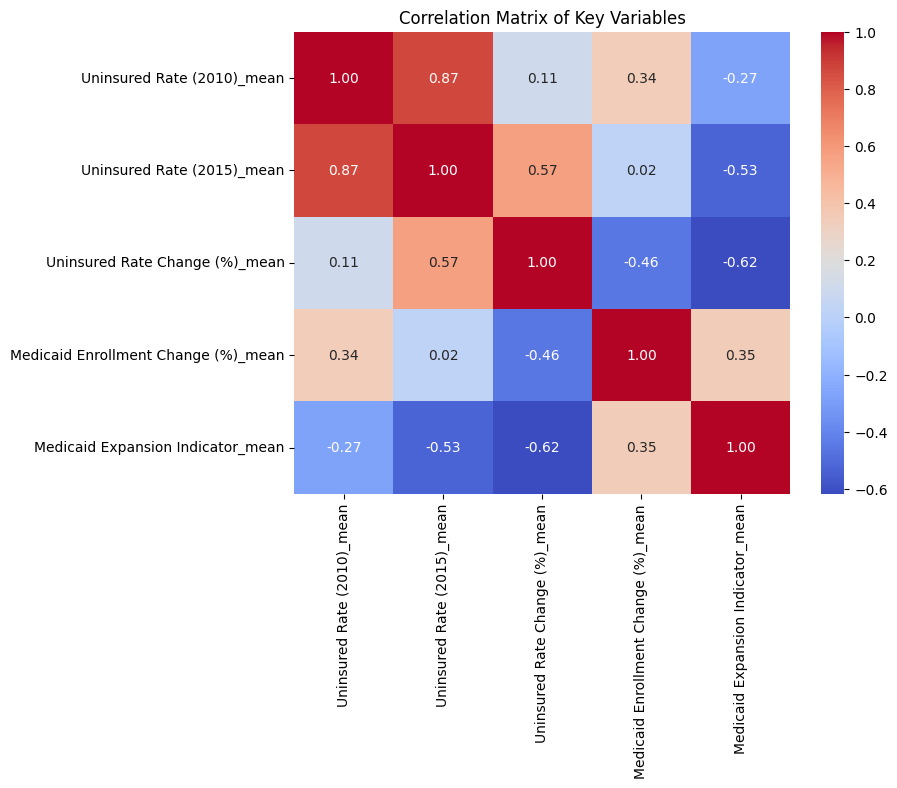

<ipython-input-8-05c769828890>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Medicaid Expansion Indicator_mean',


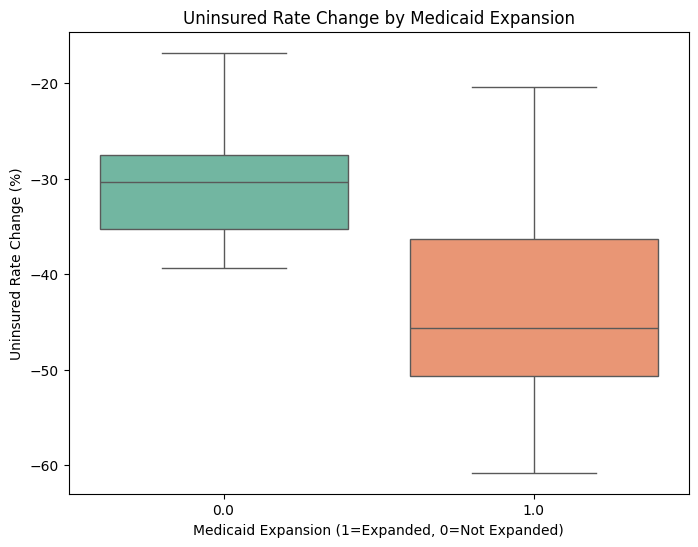

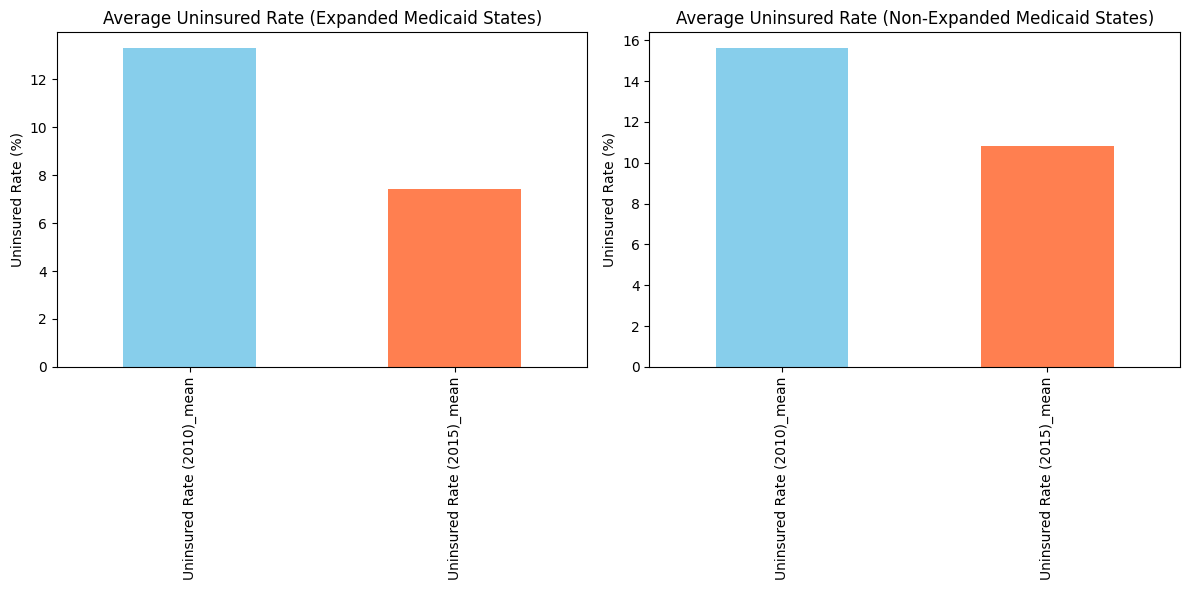

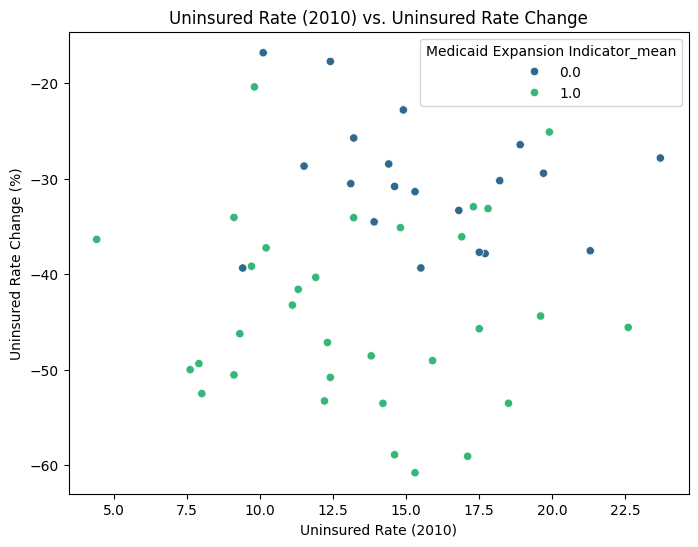

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Heatmap of correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Key Variables')
plt.show()

# 2. Box plots of uninsured rate change by Medicaid expansion
plt.figure(figsize=(8, 6))
sns.boxplot(x='Medicaid Expansion Indicator_mean',
            y='Uninsured Rate Change (%)_mean',
            data=state_summary, palette="Set2")
plt.title('Uninsured Rate Change by Medicaid Expansion')
plt.xlabel('Medicaid Expansion (1=Expanded, 0=Not Expanded)')
plt.ylabel('Uninsured Rate Change (%)')
plt.show()

# 3. Bar chart of average uninsured rate in 2010 and 2015
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
expanded_states[['Uninsured Rate (2010)_mean', 'Uninsured Rate (2015)_mean']].mean().plot(kind='bar', color=['skyblue', 'coral'])
plt.title('Average Uninsured Rate (Expanded Medicaid States)')
plt.ylabel('Uninsured Rate (%)')

plt.subplot(1, 2, 2)
non_expanded_states[['Uninsured Rate (2010)_mean', 'Uninsured Rate (2015)_mean']].mean().plot(kind='bar', color=['skyblue', 'coral'])
plt.title('Average Uninsured Rate (Non-Expanded Medicaid States)')
plt.ylabel('Uninsured Rate (%)')
plt.tight_layout()
plt.show()

# 4. Scatter plot of uninsured rate (2010) vs. uninsured rate change (%)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Uninsured Rate (2010)_mean',
                y='Uninsured Rate Change (%)_mean',
                hue='Medicaid Expansion Indicator_mean',
                data=state_summary, palette="viridis")
plt.title('Uninsured Rate (2010) vs. Uninsured Rate Change')
plt.xlabel('Uninsured Rate (2010)')
plt.ylabel('Uninsured Rate Change (%)')
plt.show()

## Summary:

### Q&A
* **What is the impact of Medicaid expansion on the uninsured rate?** States that expanded Medicaid experienced a significantly larger reduction in their uninsured rates compared to states that did not expand Medicaid. The average uninsured rate change for expanded states was -43.99%, while for non-expanded states it was -30.33%.

### Data Analysis Key Findings
* **Missing Value Imputation:** A single missing value in the 'Medicaid Enrollment Change (2013-2016)' column was imputed using the median value.
* **Outlier Handling:** Outliers in several columns ('Health Insurance Coverage Change (2010-2015)', 'Employer Health Insurance Coverage (2015)', 'Marketplace Health Insurance Coverage (2016)', and 'Marketplace Tax Credits (2016)') were handled using winsorizing with a 5% limit on both ends of the distribution.
* **Correlation Analysis:** A strong positive correlation was observed between uninsured rates in 2010 and 2015. A negative correlation was found between Medicaid expansion and the uninsured rate in 2015 and the change in uninsured rates, indicating that Medicaid expansion is associated with a decrease in the uninsured population.
* **Medicaid Expansion Impact:** States with Medicaid expansion had a substantially larger decrease (-43.99\\%) in their uninsured population compared to states without expansion (-30.33\\%).

### Insights or Next Steps
* Medicaid expansion appears to be significantly correlated with a reduction in the uninsured rate. Further investigation could explore the causal relationship between the two.
* Investigate the potential impact of other factors (e.g., economic conditions, state policies) on health insurance coverage changes.
